In [3]:
import numpy as np
import scipy
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import math
import matplotlib.pyplot as plt

# Experiment 1 - The Law of Reflection


In [4]:
def predict_angle_relation(x, A, B):
    return B*x+A

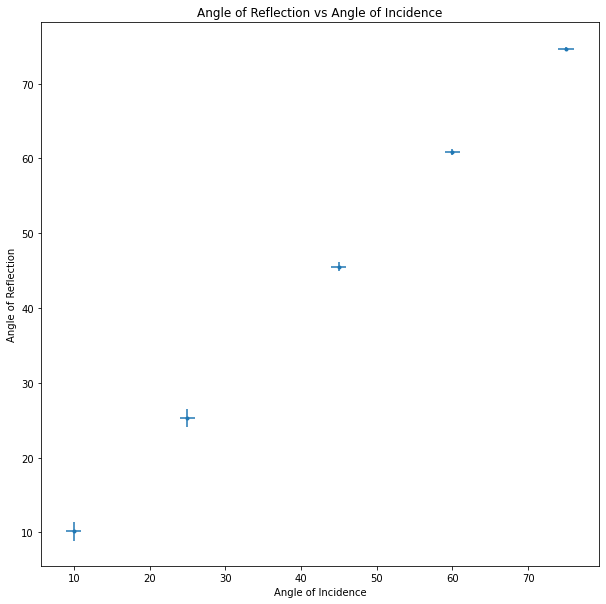

best-fit parameters:  0.3498168498154315 0.9982600732600695
uncertainties for our parameters:  [0.49797222 0.01017542]
Model is:y=Bx+A where B=1.00+-0.01 and A=0.50+-0.35
Reduced Chi-Square 0.3223032180468195


In [5]:
fig, ax = plt.subplots(figsize=(10,10))

angle_of_incidence = np.array([10, 25, 45, 60, 75])
angle_of_reflection = np.array([10.125, 25.25, 45.5, 60.875, 74.625]) #This is the average angle of reflection
yerrors=np.array([1.301708279, 1.201850425, 0.6009252126, 0.4409585518, 0.2886751346])

xerrors=np.linspace(1, 1, 5)
ax.errorbar(angle_of_incidence, angle_of_reflection, fmt='.', xerr=xerrors, yerr=yerrors) # Errors too small for large angles

ax.set_xlabel('Angle of Incidence')
ax.set_ylabel('Angle of Reflection')

ax.set_title('Angle of Reflection vs Angle of Incidence')
plt.show()

popt, pcov = scipy.optimize.curve_fit(predict_angle_relation, angle_of_incidence, angle_of_reflection)
print('best-fit parameters: ', popt[0], popt[1])
popt_uncertainties = np.sqrt(np.diag(pcov)) 
print('uncertainties for our parameters: ', popt_uncertainties) 
print('Model is:y=Bx+A where B=1.00+-0.01 and A=0.50+-0.35')


weights=1/np.sqrt((yerrors)**2+(xerrors)**2)

chi_squared_reduced = (sum(weights*(angle_of_reflection - popt[1]*angle_of_incidence)**2))/4
print('Reduced Chi-Square', chi_squared_reduced) #degree of freedom = 5-1=4



# Experiment 2 - The Law of Refraction

In [6]:
angle_of_incidence = np.array(np.radians([10, 25, 45, 60]))
lateral_distance = np.array([0.45, 1.12, 2.17, 3.27]) #Average lateral distance taken over here
lateral_distance_errors = np.array([0.02886751346, 0.01666666667, 0.06666666667, 0.03333333333])
width_of_glass_slab = 1.9
z=lateral_distance/np.sqrt(lateral_distance**2+4*width_of_glass_slab**2)

n_glass = (np.sqrt(lateral_distance**2+4*width_of_glass_slab**2)/lateral_distance)*np.sin(angle_of_incidence)

temp2=(width_of_glass_slab*lateral_distance_errors)**2
temp3=(4*width_of_glass_slab*np.sin(angle_of_incidence)*z/lateral_distance**3)**2
errors_n_glass=np.sqrt(temp2*temp3)


print('Refractive index of glass with each data point:', np.round(n_glass,2))
print('Errors in refractive index:', np.round(errors_n_glass,2))

Refractive index of glass with each data point: [1.48 1.49 1.43 1.33]
Errors in refractive index: [0.09 0.02 0.03 0.01]


In [7]:
#Part 2
#Using Sample Statistics for each data point. Parent statistics inappropriate
#Done on Excel

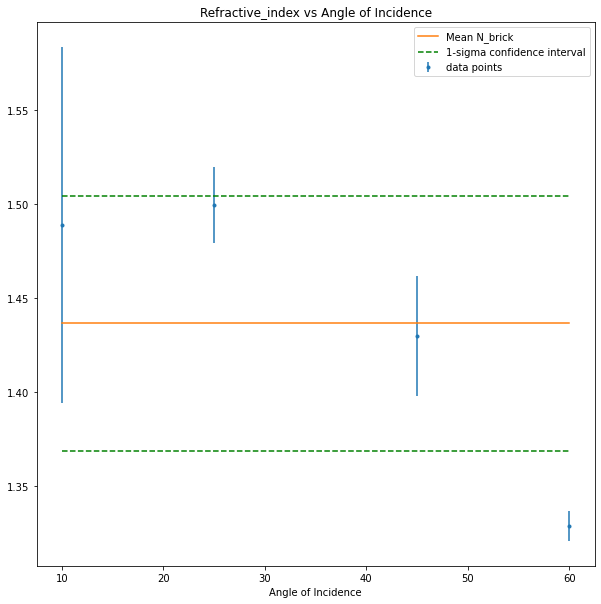

In [8]:
mean_n_glass = np.array([1.48882721, 1.499603301, 1.429805411,1.328686559])
yerrors=np.array([0.09478742913, 0.02028875521, 0.03210710655, 0.007894994262])
fig, ax = plt.subplots(figsize=(10,10))
angle_of_incidence=np.array([10, 25, 45, 60])
ax.errorbar(angle_of_incidence, mean_n_glass, fmt='.', yerr=yerrors,label='data points') # Errors too small for large angles

x=np.linspace(sum(mean_n_glass)/4, sum(mean_n_glass)/4, 4)
z=np.linspace(np.std(mean_n_glass),np.std(mean_n_glass),4)
plt.plot(angle_of_incidence, x, label='Mean N_brick')
plt.plot(angle_of_incidence, x+z,  linestyle='--', color = 'g', label='1-sigma confidence interval')
plt.plot(angle_of_incidence, x-z,  linestyle='--', color = 'g')


ax.set_xlabel('Refractive index')
ax.set_xlabel('Angle of Incidence')

ax.set_title('Refractive_index vs Angle of Incidence')
plt.legend(loc="upper right")
plt.show()


In [9]:
actual_value = 1.53
error_in_n= np.std(mean_n_glass)/(4)
alpha_e = np.abs(1.53-sum(mean_n_glass)/4)
other_side_of_agreement=np.sqrt(0.01**2+(np.std(mean_n_glass)/4)**2)
print(alpha_e<2*other_side_of_agreement) #Does not agree with expected value as expected
#There is an outlier data point at 60 degrees.

False


# Experiment 3



In [10]:
def ex3model(x, B):
    return -x+B

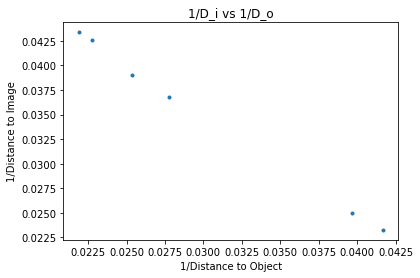

Covariance matrix is [[ 7.49611802e-05 -7.59039827e-05]
 [-7.59039827e-05  7.69770432e-05]]
Covariance is -7.590398270711739e-05
Coefficient of linear correlation is -1.1990767709673629


In [113]:
distance_object = np.array([25.2, 39.4, 24, 36, 44, 45.7])
distance_image = np.array([40, 25.6, 43, 27.2, 23.5, 23.05])
x = 1/distance_object
y= 1/distance_image
matrix = np.stack((x, y), axis=0)
covariance=np.cov(matrix)
plt.scatter(x,y, marker = '.')
plt.xlabel('1/Distance to Object')
plt.ylabel('1/Distance to Image')
plt.title('1/D_i vs 1/D_o')
plt.show()
print('Covariance matrix is', covariance)
print('Covariance is', covariance[0][1])
print('Coefficient of linear correlation is',covariance[0][1]/(np.std(x)*np.std(y)))
#Well supported data

In [119]:
y_errors=np.array([1.3, 1.2, 1.5, 1.3, 1.4, 1.5])
x_errors=np.array([1.8, 1.7, 1.6, 1.8, 1.9, 2.0])

alpha_eqv_i=np.sqrt(y_errors**2+x_errors**2)
print('Error after removing x', alpha_eqv_i)
weights = 1/uncertainty**2




Error after removing x [2.22036033 2.0808652  2.19317122 2.22036033 2.36008474 2.5       ]


In [137]:
weights = 1/alpha_eqv_i**2
sum_ofx=sum(weights*x)
sum_ofy=sum(weights*y)
sum_of_weights=sum(weights)
best_fit=(sum_ofx+sum_ofy)/sum_of_weights
print('Best fit:',best_fit)
print('uncertainties for our best fit:', 1/np.sqrt(sum_of_weights))

#Best fit is actually the focal length. 
print('Focal length is', np.round(1/best_fit, 1),'+-', np.round(1/np.sqrt(sum_of_weights),1), 'cm')

#Checking with scipy
popt, pcov = scipy.optimize.curve_fit(ex3model, x, y)
print('best-fit parameters: ', popt)

Best fit: 0.06482346945097729
uncertainties for our best fit: 0.9189950636036701
Focal length is 15.4 +- 0.9 cm
best-fit parameters:  [0.06485616]


In [170]:
Magnification_distance = -distance_image/distance_object
Magnification_height=np.array([-1.55, -0.6125, -1.025, -1, 0.5167, -0.546])

print('Magnification for distance', Magnification_distance)
print('Magnification for height', Magnification_height)
Normalized_residuals=1/weights*(Magnification_distance-Magnification_height)
reduced_chi_squared = sum(Normalized_residuals)
print("reduced_chi_squared", reduced_chi_squared) #Bad Prediction. 


Magnification for distance [-1.58730159 -0.64974619 -1.79166667 -0.75555556 -0.53409091 -0.50437637]
Magnification for height [-1.55   -0.6125 -1.025  -1.      0.5167 -0.546 ]
reduced_chi_squared -8.420486057410168
